Key  0, hyp = 00: 
Key  0, hyp = 01: 
Key  0, hyp = 02: 
Key  0, hyp = 03: 
Key  0, hyp = 04: 
Key  0, hyp = 05: 
Key  0, hyp = 06: 
Key  0, hyp = 07: 
Key  0, hyp = 08: 
Key  0, hyp = 09: 
Key  0, hyp = 0a: 
Key  0, hyp = 0b: 
Key  0, hyp = 0c: 
Key  0, hyp = 0d: 
Key  0, hyp = 0e: 
Key  0, hyp = 0f: 
Key  0, hyp = 10: 
Key  0, hyp = 11: 
Key  0, hyp = 12: 
Key  0, hyp = 13: 
Key  0, hyp = 14: 
Key  0, hyp = 15: 
Key  0, hyp = 16: 
Key  0, hyp = 17: 
Key  0, hyp = 18: 
Key  0, hyp = 19: 
Key  0, hyp = 1a: 
Key  0, hyp = 1b: 
Key  0, hyp = 1c: 
Key  0, hyp = 1d: 
Key  0, hyp = 1e: 
Key  0, hyp = 1f: 
Key  0, hyp = 20: 
Key  0, hyp = 21: 
Key  0, hyp = 22: 
Key  0, hyp = 23: 
Key  0, hyp = 24: 
Key  0, hyp = 25: 
Key  0, hyp = 26: 
Key  0, hyp = 27: 
Key  0, hyp = 28: 
Key  0, hyp = 29: 
Key  0, hyp = 2a: 
Key  0, hyp = 2b: 
Key  0, hyp = 2c: 
Key  0, hyp = 2d: 
Key  0, hyp = 2e: 
Key  0, hyp = 2f: 
Key  0, hyp = 30: 
Key  0, hyp = 31: 
Key  0, hyp = 32: 
Key  0, hyp = 33: 
Key  0, hyp 

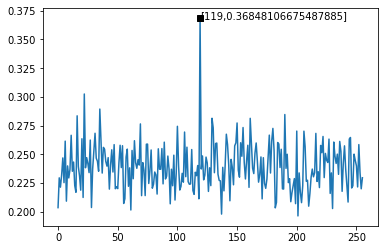

The Key is: 
77 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#S-BOX table
sbox=(
0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76,
0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0,
0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15,
0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75,
0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84,
0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf,
0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8,
0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2,
0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73,
0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb,
0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79,
0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08,
0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a,
0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e,
0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf,
0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16)


#SubBytes
def sub_bytes(pt, keyguess):
    return sbox[pt ^ keyguess]


traces = np.load(r'pns.npy').astype(float)
pt = np.load(r'pts.npy')
trace_cnt = np.shape(traces)[0]
points_cnt = np.shape(traces)[1]

keys = []
traces=traces.T

# Generate Hamming Weight Array
HW =[] 
for n in range(0,256):
  HW.append(bin(n).count("1")) 



for pi in range(0, 16):
    cpa_data = []
    for kguess in range(0, 256):
        print ("Key %2d, hyp = %02x: "%(pi, kguess),)

        hyp = np.zeros(trace_cnt)
        for pj in range(0, trace_cnt):
            hyp[pj] = HW[sub_bytes(pt[pj][pi], kguess)]


        tmp=[]
       
        for pj in range (0,points_cnt):
           tmp.append(abs(np.corrcoef(hyp,traces[pj])[0,1]))

        cpa_data.append(max(tmp))



    index = np.argmax(cpa_data)
    keys.append(index);
    print(index)
   
    #draw the statitical chart

    plt.plot(cpa_data)
    plt.plot(index,cpa_data[index],'ks')
    show_max='['+str(index)+','+str(cpa_data[index])+']'
    plt.annotate(show_max,xytext=(index,cpa_data[index]),xy=(index,cpa_data[index]))
    plt.show()
    break



print ("The Key is: ",)
for b in keys: print ("%02x "%b,)


119


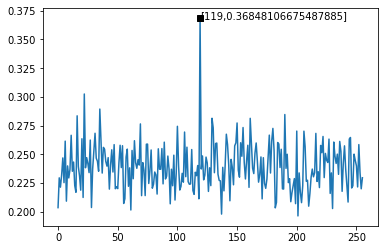

112


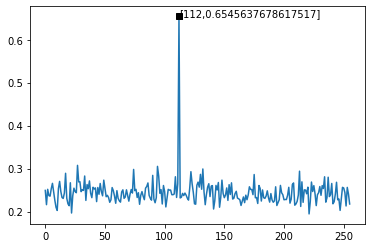

38


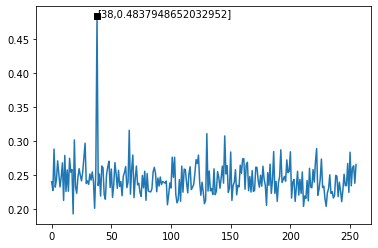

138


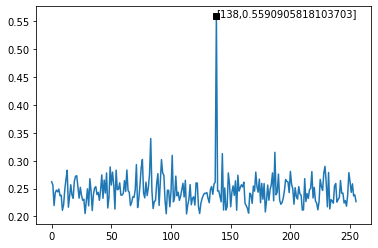

81


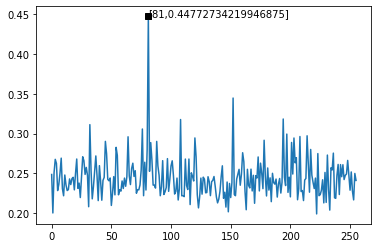

191


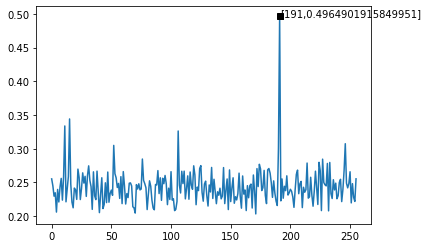

169


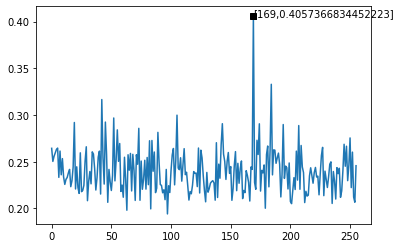

178


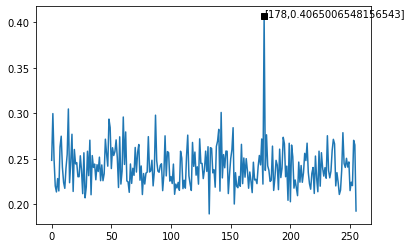

47


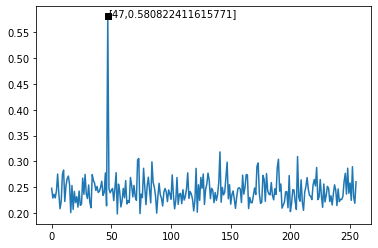

111


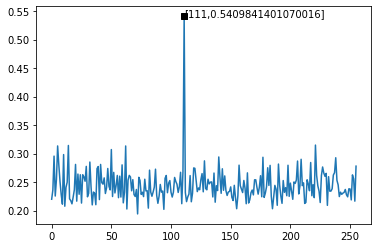

64


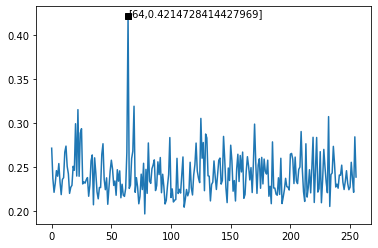

105


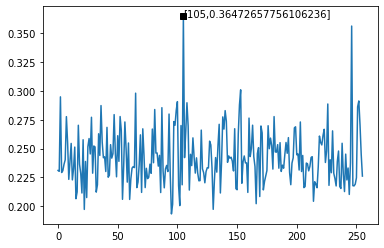

195


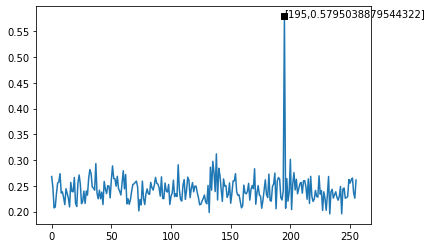

149


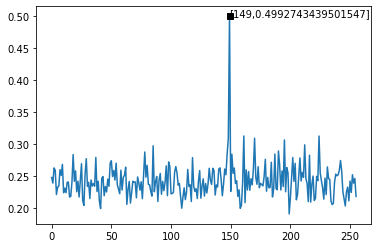

219


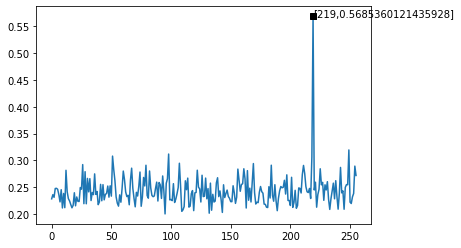

91


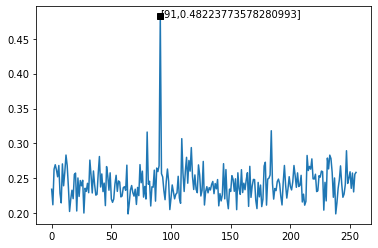

The Key is: 
77 
70 
26 
8a 
51 
bf 
a9 
b2 
2f 
6f 
40 
69 
c3 
95 
db 
5b 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#S-BOX table
sbox=(
0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76,
0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0,
0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15,
0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75,
0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84,
0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf,
0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8,
0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2,
0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73,
0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb,
0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79,
0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08,
0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a,
0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e,
0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf,
0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16)


#SubBytes
def sub_bytes(pt, keyguess):
    return sbox[pt ^ keyguess]


traces = np.load(r'pns.npy').astype(float)
pt = np.load(r'pts.npy')
trace_cnt = np.shape(traces)[0]
points_cnt = np.shape(traces)[1]

keys = []
traces=traces.T

# Generate Hamming Weight Array
HW =[] 
for n in range(0,256):
  HW.append(bin(n).count("1")) 



for pi in range(0, 16):
    cpa_data = []
    for kguess in range(0, 256):
#         print ("Key %2d, hyp = %02x: "%(pi, kguess),)

        hyp = np.zeros(trace_cnt)
        for pj in range(0, trace_cnt):
            hyp[pj] = HW[sub_bytes(pt[pj][pi], kguess)]


        tmp=[]
       
        for pj in range (0,points_cnt):
           tmp.append(abs(np.corrcoef(hyp,traces[pj])[0,1]))

        cpa_data.append(max(tmp))



    index = np.argmax(cpa_data)
    keys.append(index);
    print(index)
   
    #draw the statitical chart

    plt.plot(cpa_data)
    plt.plot(index,cpa_data[index],'ks')
    show_max='['+str(index)+','+str(cpa_data[index])+']'
    plt.annotate(show_max,xytext=(index,cpa_data[index]),xy=(index,cpa_data[index]))
    plt.show()
    



print ("The Key is: ",)
for b in keys: print ("%02x "%b,)
